# 回归率曲线

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

In [23]:
decision_scores

array([-22.05698872, -33.0294801 , -16.21340124, -80.37927135,
       -48.2512484 , -24.54011888, -44.39165518, -25.04307342,
        -0.97825932, -19.7175234 , -66.25139047, -51.09618762,
       -31.49353062, -46.05326549, -38.67891437, -29.80475821,
       -37.58859784, -82.5757588 , -37.81913688, -11.01165136,
        -9.17440891, -85.13009105, -16.71605329, -46.23739157,
        -5.33004151, -47.91760576, -11.66736692, -39.19642117,
       -25.25302546, -14.36644282, -16.99792558, -28.91917652,
       -34.33955757, -29.47642261,  -7.85813385,  -3.82079588,
       -24.08193513, -22.16361045, -33.61241617, -23.14032762,
       -26.91815785, -62.38948524, -38.85707838, -66.77271748,
       -20.14486056, -17.47888542, -18.06800584, -22.22236762,
       -29.62315097, -19.73166906,   1.49551355,   8.32089659,
       -36.29344303, -42.50742316, -25.90456531, -34.98970987,
        -8.42024407, -50.04735304, -51.48216029,  19.88973194,
        -8.91891746, -31.99354552, -11.66113907,  -0.47

In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls =[]
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))


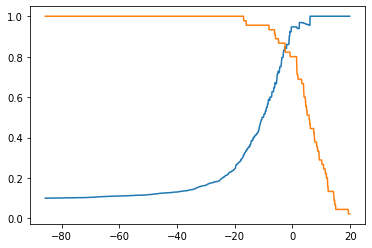

In [25]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

## Precision-Recall 曲线

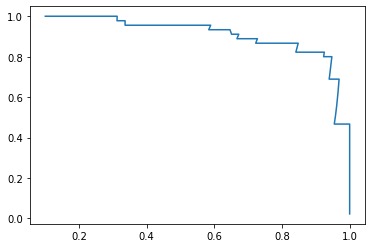

In [26]:
plt.plot(precisions, recalls)
plt.show()

## scikit-learn中的Precision-Recall曲线

In [34]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [35]:
precisions.shape

(145,)

In [36]:
recalls.shape

(145,)

In [37]:
threshold.shape

(144,)

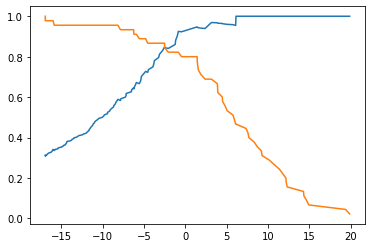

In [38]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

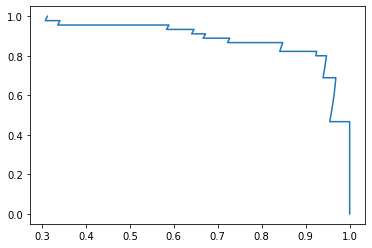

In [39]:
plt.plot(precisions, recalls)
plt.show()